In [1]:
from anomalydetection.rpca import rpca
from anomalydetection.RDAE import RDAE
from anomalydetection.utils.utils import l1shrink
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from anomalydetection.utils.utils import fnorm
from PIL import Image
import gc
import os
import itertools
from sklearn.decomposition import PCA
import cv2
from sklearn.preprocessing import MinMaxScaler

In [2]:
# without resize
images = [file for file in os.listdir('./data/yaleB38') if file.endswith('pgm')]
temp = []
for image_name in images:
    img = mpimg.imread('./data/yaleB38/' + image_name) 
    img = img.reshape(img.size)
    temp.append(img)
data = np.array(temp)

In [34]:
# with resize
images = [file for file in os.listdir('./data/yaleB38') if file.endswith('pgm')]
temp = []
for image_name in images:
    img = cv2.imread('./data/yaleB38/' + image_name, cv2.IMREAD_GRAYSCALE)
    
    img = cv2.resize(img,(84, 96),cv2.INTER_AREA)
    img = img.flatten()
    temp.append(img)
data = np.array(temp)

In [32]:
lambdas=[0.0005, 0.0001, 0.002, 0.003, 0.007, 0.010, 0.03]

In [6]:
#l_costs = []
#LS = []

lambdas=[0.0005, 0.0001, 0.002, 0.003, 0.007, 0.010, 0.03]

noise = np.linalg.norm(data - data[0], axis=1)
for l in lambdas:
    model = rpca(verbose=False, lambda_=l, max_iter=500)
    L, S = model.fit_transform(data)
    
    costs = np.linalg.norm(L - data[0], axis=1) / noise
    l_costs.append(costs)
    costs[0] = 0
    LS.append(L)
    print(costs)

0.002


C:\Users\gblan\AppData\Local\Temp\ipykernel_9428\482787938.py:12: RuntimeWarning: divide by zero encountered in divide
  costs = np.linalg.norm(L - data[0], axis=1) / noise


[0.         0.10758926 0.21674926 0.48274208 0.08908898 0.17434632
 0.09352719 0.08796442 0.10682032 0.11374568 0.12037658 0.12600534
 0.14113682 0.24020419 0.17648423 0.23231328 0.29743626 0.41655399
 0.23792432 0.30350716 0.33812563 0.34717871 0.34938464 0.38776043
 0.4247718  0.40371986 0.44113178 0.42250503 0.51536836 0.47622644
 0.47705582 0.47702196 0.47242203 0.499637   0.47649165 0.11309891
 0.0930632  0.09744915 0.1052193  0.12750266 0.12988137 0.11728562
 0.21159087 0.1495796  0.21296386 0.27059512 0.42996135 0.20730131
 0.26851331 0.33701824 0.35316215 0.34022503 0.38167639 0.40383677
 0.39652645 0.41215971 0.41155602 0.44463877 0.48418653 0.47927276
 0.48927078 0.48660816 0.51213288 0.49089767]
0.0005
[0.         0.48882328 0.46299475 0.50431115 0.57816858 0.45666942
 0.54679688 0.51123255 0.58103268 0.49485383 0.54121931 0.52479637
 0.50790984 0.47626804 0.4746801  0.53674142 0.51697057 0.48101313
 0.53580814 0.55292536 0.51108119 0.55797347 0.55405073 0.5661969
 0.5303661

In [24]:
tests = []
l_costs_pca = []
ncs = [1, 2, 4, 7, 10, 15]
noise = np.linalg.norm(data - data[0], axis=1)
for nc in ncs:
    pca = PCA(n_components=nc, svd_solver='full')
    pca.fit_transform(data)

    x_redused = np.dot(data - pca.mean_, pca.components_.T)
    x_inversed = np.dot(x_redused, pca.components_) + pca.mean_
    
    tests.append(x_inversed)
    p_costs = np.linalg.norm(x_inversed - data[0], axis=1) / noise
    p_costs[0] = 0
    l_costs_pca.append(p_costs[1:])

C:\Users\gblan\AppData\Local\Temp\ipykernel_9428\2736909297.py:13: RuntimeWarning: divide by zero encountered in divide
  p_costs = np.linalg.norm(x_inversed - data[0], axis=1) / noise
C:\Users\gblan\AppData\Local\Temp\ipykernel_9428\2736909297.py:13: RuntimeWarning: divide by zero encountered in divide
  p_costs = np.linalg.norm(x_inversed - data[0], axis=1) / noise
C:\Users\gblan\AppData\Local\Temp\ipykernel_9428\2736909297.py:13: RuntimeWarning: divide by zero encountered in divide
  p_costs = np.linalg.norm(x_inversed - data[0], axis=1) / noise
C:\Users\gblan\AppData\Local\Temp\ipykernel_9428\2736909297.py:13: RuntimeWarning: divide by zero encountered in divide
  p_costs = np.linalg.norm(x_inversed - data[0], axis=1) / noise
C:\Users\gblan\AppData\Local\Temp\ipykernel_9428\2736909297.py:13: RuntimeWarning: divide by zero encountered in divide
  p_costs = np.linalg.norm(x_inversed - data[0], axis=1) / noise
C:\Users\gblan\AppData\Local\Temp\ipykernel_9428\2736909297.py:13: RuntimeW

array([0.        , 0.10758926, 0.21674926, 0.48274208, 0.08908898,
       0.17434632, 0.09352719, 0.08796442, 0.10682032, 0.11374568,
       0.12037658, 0.12600534, 0.14113682, 0.24020419, 0.17648423,
       0.23231328, 0.29743626, 0.41655399, 0.23792432, 0.30350716,
       0.33812563, 0.34717871, 0.34938464, 0.38776043, 0.4247718 ,
       0.40371986, 0.44113178, 0.42250503, 0.51536836, 0.47622644,
       0.47705582, 0.47702196, 0.47242203, 0.499637  , 0.47649165,
       0.11309891, 0.0930632 , 0.09744915, 0.1052193 , 0.12750266,
       0.12988137, 0.11728562, 0.21159087, 0.1495796 , 0.21296386,
       0.27059512, 0.42996135, 0.20730131, 0.26851331, 0.33701824,
       0.35316215, 0.34022503, 0.38167639, 0.40383677, 0.39652645,
       0.41215971, 0.41155602, 0.44463877, 0.48418653, 0.47927276,
       0.48927078, 0.48660816, 0.51213288, 0.49089767])

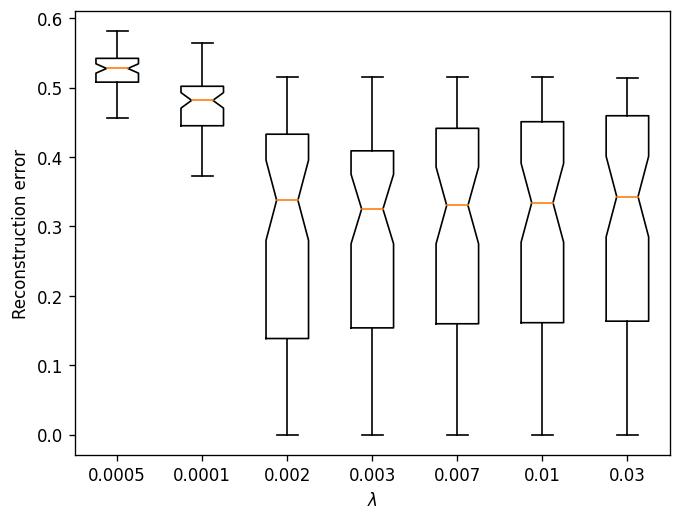

In [33]:
fig, ax = plt.subplots(1, dpi=120)
ax.boxplot(l_costs, lambdas, showfliers=False)
plt.xticks(range(1, len(lambdas)+1), lambdas)
plt.xlabel("$\lambda$")
plt.ylabel("Reconstruction error")
plt.show()

In [51]:
np.median(l_costs[3])

0.32493278154684446

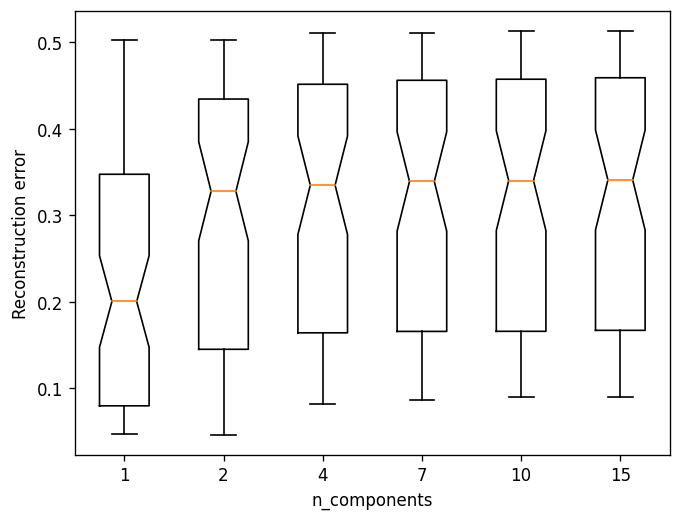

In [26]:
fig, ax = plt.subplots(1, dpi=120)
ax.boxplot(l_costs_pca, ncs, showfliers=False)
plt.xticks(range(1, len(ncs)+1), ncs)
plt.xlabel("n_components")
plt.ylabel("Reconstruction error")
plt.show()

8

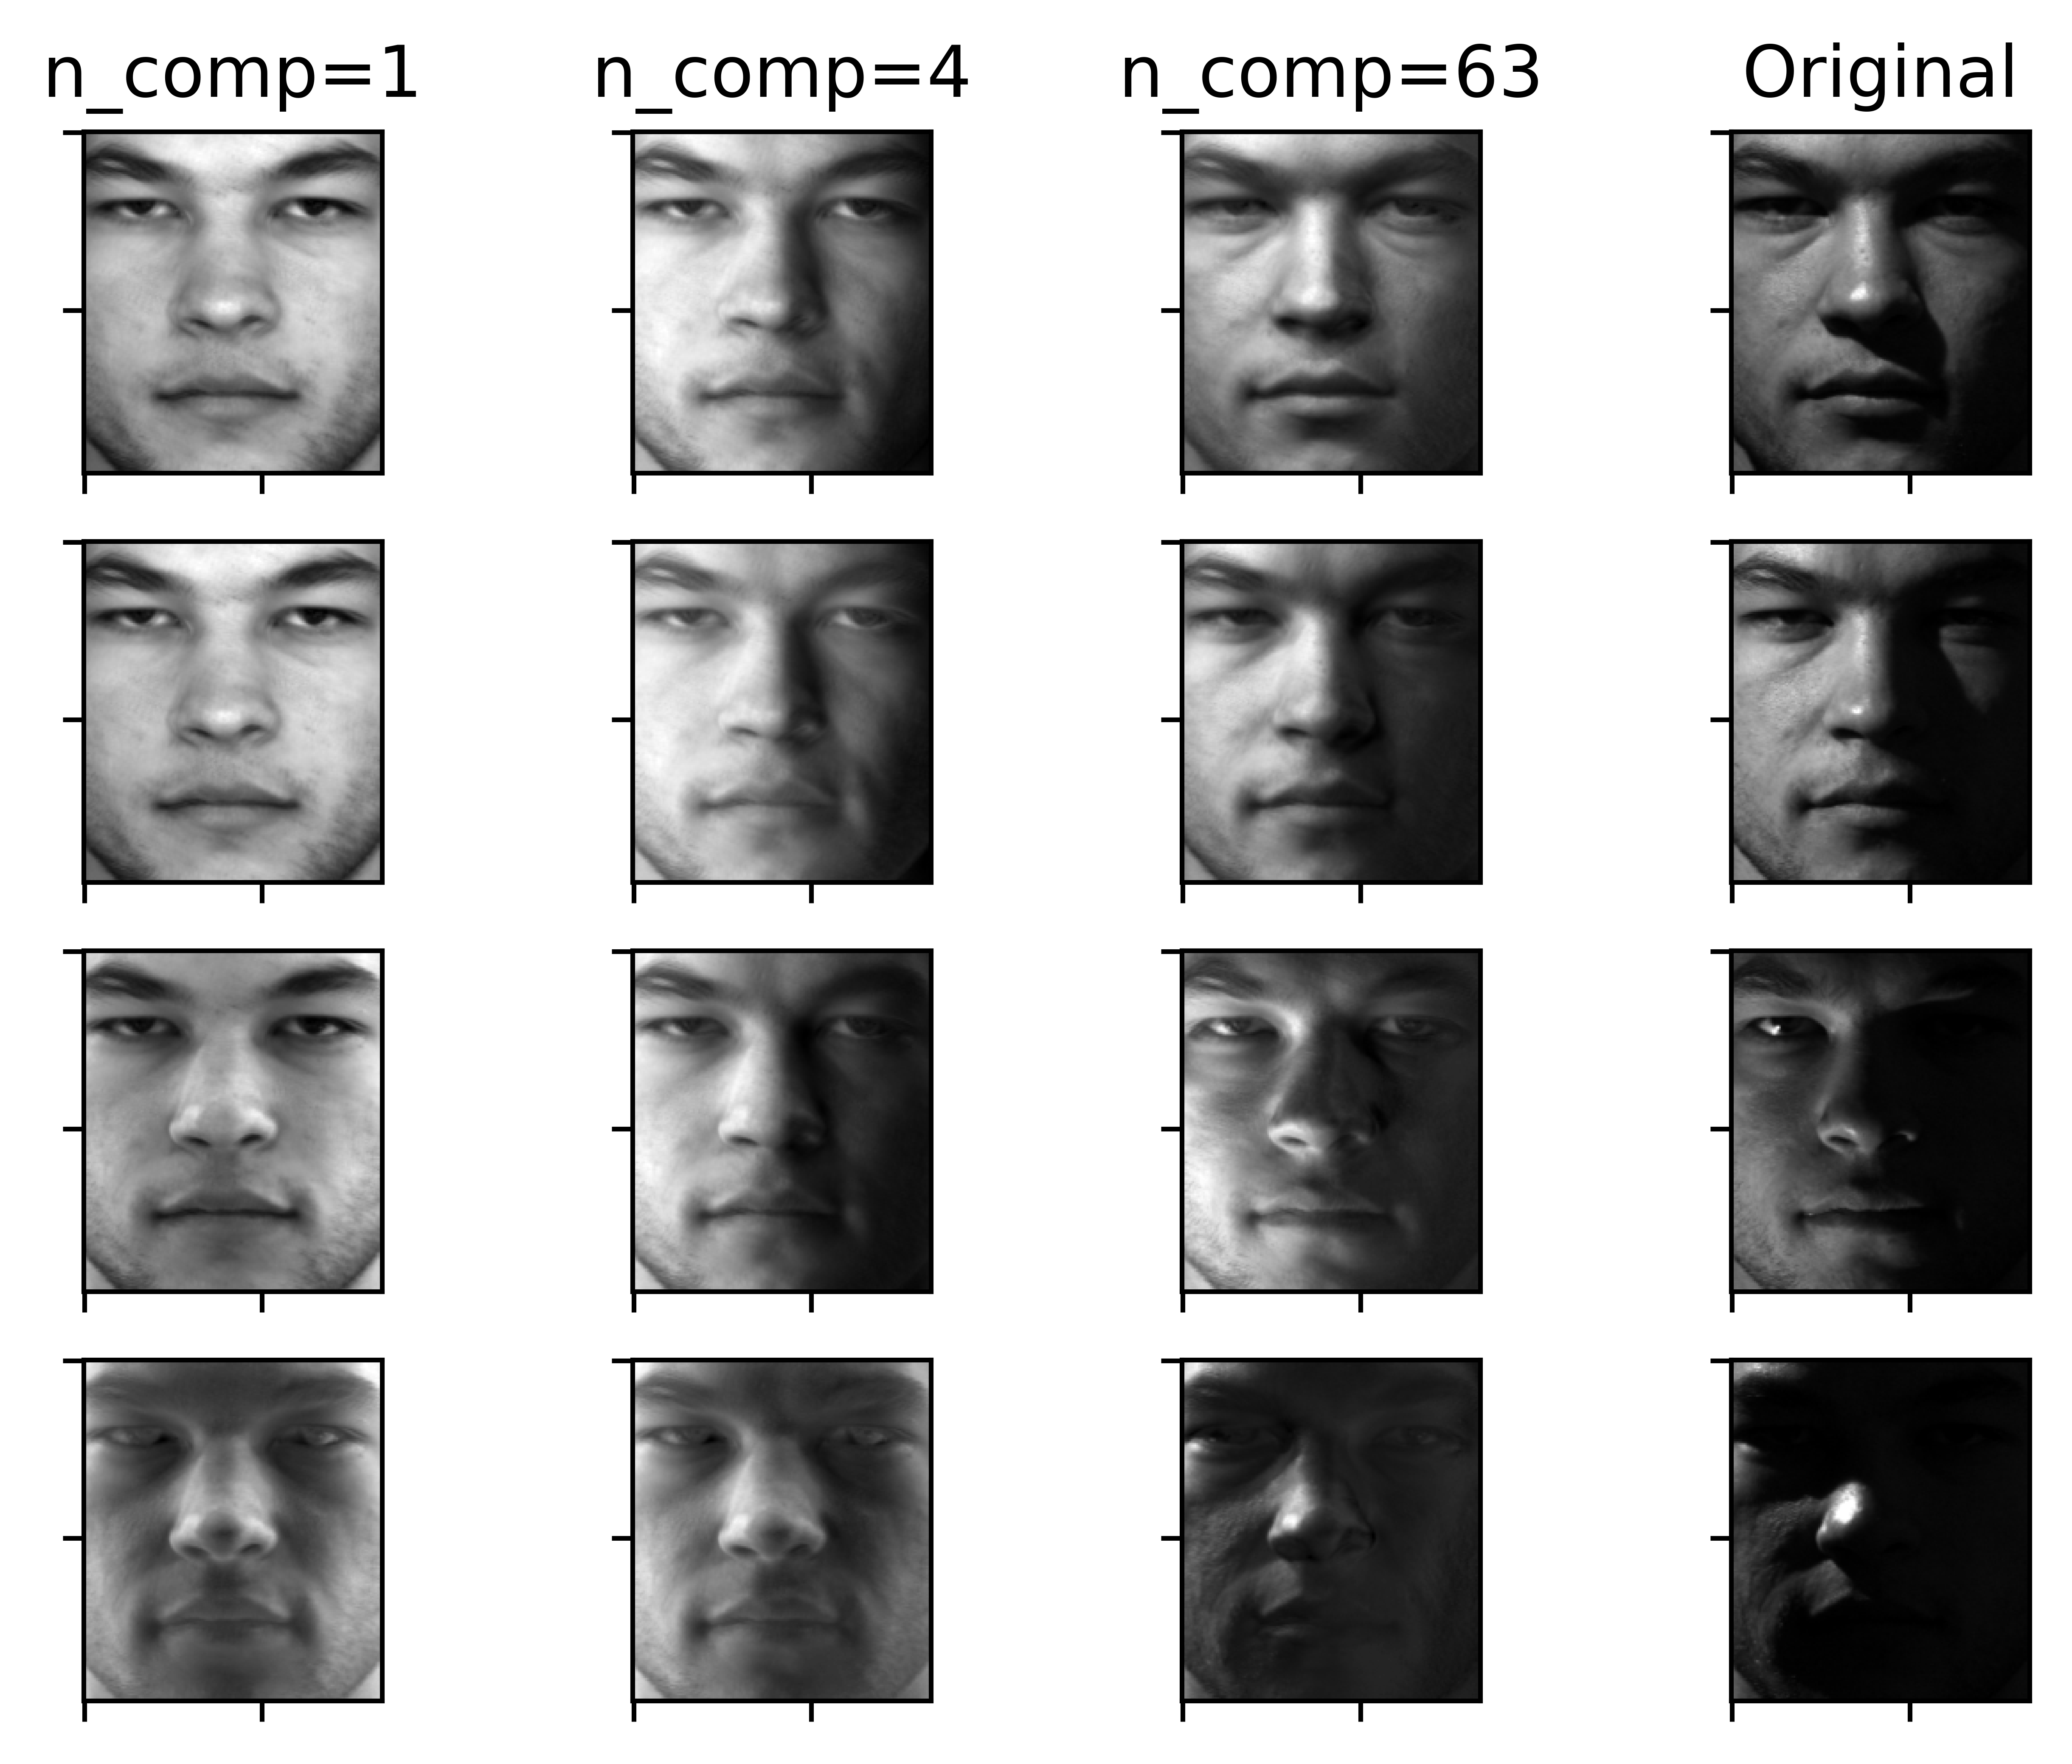

In [119]:
fig, ax = plt.subplots(4, 4, dpi=1000)
k = 0
for i in [16,21,25,30]:
    t=0
    for j in [0, 1, 9]:
        ax[k][t].imshow(tests[j][i].reshape(192, 168), cmap='gray')
        ax[k][t].xaxis.set_ticklabels([])
        ax[k][t].yaxis.set_ticklabels([])
        t+=1
    ax[k][3].imshow(data[i].reshape(192, 168), cmap='gray')
    ax[k][3].xaxis.set_ticklabels([])
    ax[k][3].yaxis.set_ticklabels([])
    
    k+=1
    
ax[0][0].set_title(f"n_comp={ncs[0]}")
ax[0][1].set_title(f"n_comp={ncs[3]}")
ax[0][2].set_title(f"n_comp={ncs[-1]}")


ax[0][3].set_title("Original")
plt.show()

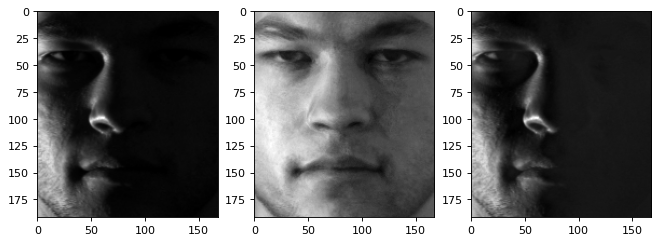

In [112]:
i = 32
l = 3
ls = LS[l].reshape((64, 192, 168))
ss = SS[l].reshape((64, 192, 168))
dd = data.reshape((64, 192, 168))
fig, ax = plt.subplots(1,3, dpi=80)
plt.subplots_adjust(left=0.1, right=1.3)


ax[0].imshow(dd[i], cmap='gray')
#ax[0].set_title('Original')
ax[1].imshow(ls[i], cmap='gray')
#ax[1].set_title('Low-rank')
ax[2].imshow(ss[i], cmap='gray')
#ax[2].set_title('Sparse')

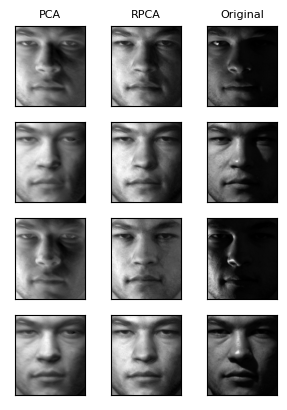

In [196]:
ii = [25, 21, 32, 16]
l1 = 5
l2 = 3
out = tests[l1].reshape((64, 192, 168))
ls = LS[l2].reshape((64, 192, 168))
fig, ax = plt.subplots(4,3)
plt.subplots_adjust(right=0.55)

j=0
ax[0][0].set_title('PCA', fontsize=8)
ax[0][1].set_title('RPCA',fontsize=8)
ax[0][2].set_title('Original',fontsize=8)
for i in ii:
    ax[j][0].imshow(out[i], cmap='gray')
    ax[j][0].set_xticks([])
    ax[j][0].set_yticks([])
    ax[j][1].imshow(ls[i], cmap='gray')
    ax[j][1].set_xticks([])
    ax[j][1].set_yticks([])
    ax[j][2].imshow(dd[i], cmap='gray')
    ax[j][2].set_xticks([])
    ax[j][2].set_yticks([])
    j+=1


In [62]:
rdae_c = []
rdae_l = []
rdae_s = []

scaler = MinMaxScaler()
data1 = scaler.fit_transform(data)

noise = np.linalg.norm(data1 - data1[0], axis=1)
for l in np.linspace(0.00001, 0.01, 5): 
    model = RDAE(verbose=False, encoder_layer_size=[8064, 4032], decoder_layer_size=[8064], 
                 lambda_=l, dropout=0, activation_function='sigmoid')
    model.compile(loss='BCE', optimizer = tf.keras.optimizers.Adam(0.005)) 
    L, S = model.fit_transform(data1, 25, 20, 5)

    costs = np.linalg.norm(L - data1[0], axis=1) / noise
    costs[0] = 0
    print(f"Lambda: {l}, cost: {np.mean(costs)}")
    rdae_c.append(costs)
    rdae_l.append(L)
    rdae_s.append(S)
    

    del model
    tf.keras.backend.clear_session()
    gc.collect()

C:\Users\gblan\AppData\Local\Temp\ipykernel_9428\4154595923.py:15: RuntimeWarning: divide by zero encountered in divide
  costs = np.linalg.norm(L - data1[0], axis=1) / noise


Lambda: 1e-05, cost: 1.3290544199013934
Lambda: 0.0025075, cost: 1.6771244877414833
Lambda: 0.005005, cost: 1.3432601354651923
Lambda: 0.0075025000000000005, cost: 0.9317568577724633
Lambda: 0.01, cost: 1.6688860500956135


In [57]:
del model
tf.keras.backend.clear_session()
gc.collect()

4270

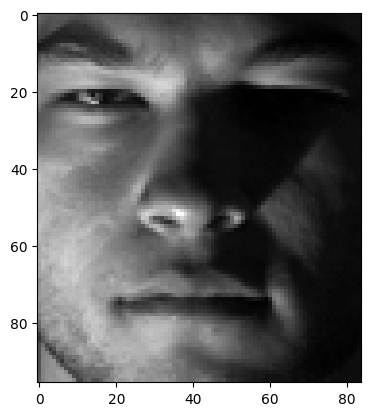

In [60]:
plt.imshow(data[20].reshape(96, 84), cmap='gray')

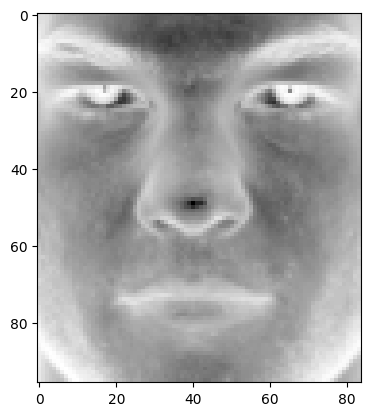

In [146]:
plt.imshow((rdae_l[1][30]).reshape(96,84), cmap='gray')

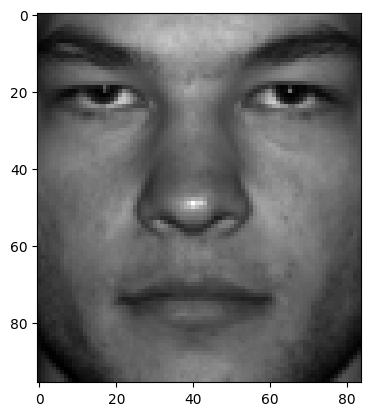

In [124]:
plt.imshow(data[0].reshape(96,84), cmap='gray')

In [134]:
data1[0]

array([0.12941176, 0.13114754, 0.1372549 , ..., 0.40251572, 0.35802469,
       0.34591195])